# Logistic Regression - Binary Classification

In [ ]:
!pip install autoviz

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.close('all')
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing the data

soc_net = pd.read_csv("Social_Network_Ads.csv")
soc_net.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male  19        19000           0    
1  15810944    Male  35        20000           0    
2  15668575  Female  26        43000           0    
3  15603246  Female  27        57000           0    
4  15804002    Male  19        76000           0

In [ ]:
# Profile of the data

soc_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# Null Values

soc_net.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# Duplicated Values

soc_net.duplicated().sum()

0

In [ ]:
# Unique value in the data

soc_net.nunique().sort_values(ascending=True)

Gender               2
Purchased            2
Age                 43
EstimatedSalary    117
User ID            400
dtype: int64

In [ ]:
# List of unique value in column

for i in soc_net.columns:
  print(f'Unique value in {i}:')
  print(soc_net[i].unique(),'\n')

Unique value in User ID:
[15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829
 15600575 15727311 15570769 15606274 15746139 15704987 15628972 15697686
 15733883 15617482 15704583 15621083 15649487 15736760 15714658 15599081
 15705113 15631159 15792818 15633531 15744529 15669656 15581198 15729054
 15573452 15776733 15724858 15713144 15690188 15689425 15671766 15782806
 15764419 15591915 15772798 15792008 15715541 15639277 15798850 15776348
 15727696 15793813 15694395 15764195 15744919 15671655 15654901 15649136
 15775562 15807481 15642885 15789109 15814004 15673619 15595135 15583681
 15605000 15718071 15679760 15654574 15577178 15595324 15756932 15726358
 15595228 15782530 15592877 15651983 15746737 15774179 15667265 15655123
 15595917 15668385 15709476 15711218 15798659 15663939 15694946 15631912
 15768816 15682268 15684801 15636428 15809823 15699284 15786993 15709441
 15710257 15582492 15575694 15756820 15766289 15593014 15584545 15675949
 15672091 15801658 1570618

In [ ]:
# Statistical Analysis

soc_net.describe(include = 'all').T

count  unique   top   freq      mean           std       \
User ID          400.0   NaN      NaN  NaN  15691539.7575  71658.321581   
Gender             400     2   Female  204            NaN           NaN   
Age              400.0   NaN      NaN  NaN         37.655     10.482877   
EstimatedSalary  400.0   NaN      NaN  NaN        69742.5  34096.960282   
Purchased        400.0   NaN      NaN  NaN         0.3575      0.479864   

                    min         25%          50%         75%         max      
User ID          15566689.0  15626763.75  15694341.5  15750363.0  15815236.0  
Gender                  NaN          NaN         NaN         NaN         NaN  
Age                    18.0        29.75        37.0        46.0        60.0  
EstimatedSalary     15000.0      43000.0     70000.0     88000.0    150000.0  
Purchased               0.0          0.0         0.0         1.0         1.0

Shape of your Data Set loaded: (400, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['User ID']
To fix these data quality issues in the dataset, import Fix

Number of All Scatter Plots = 3


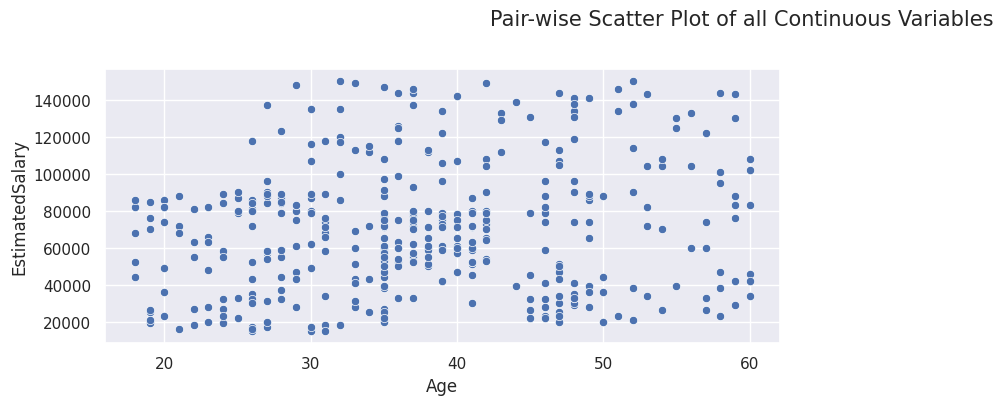

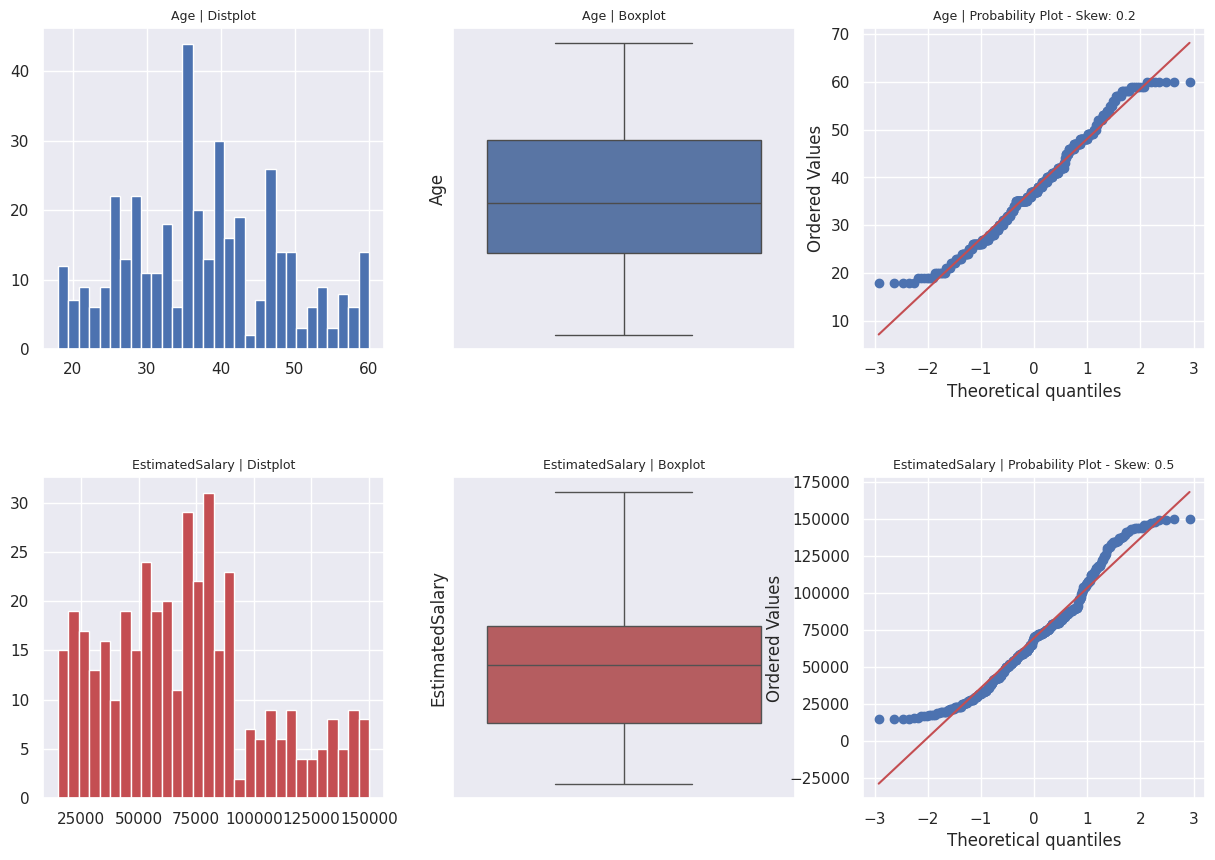

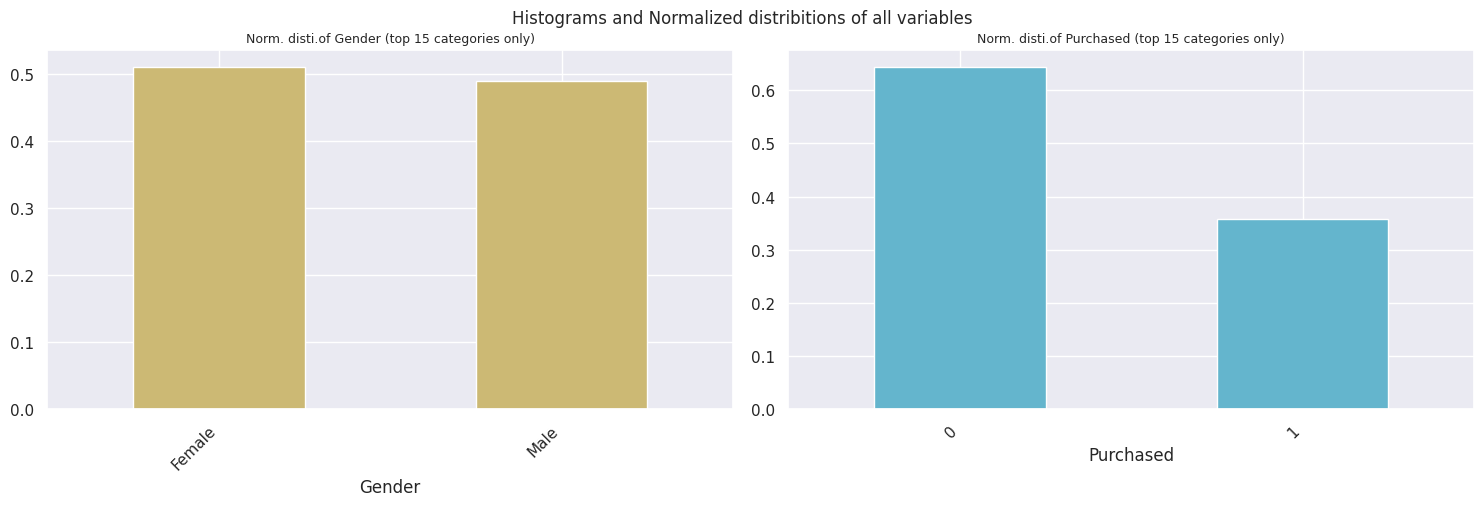

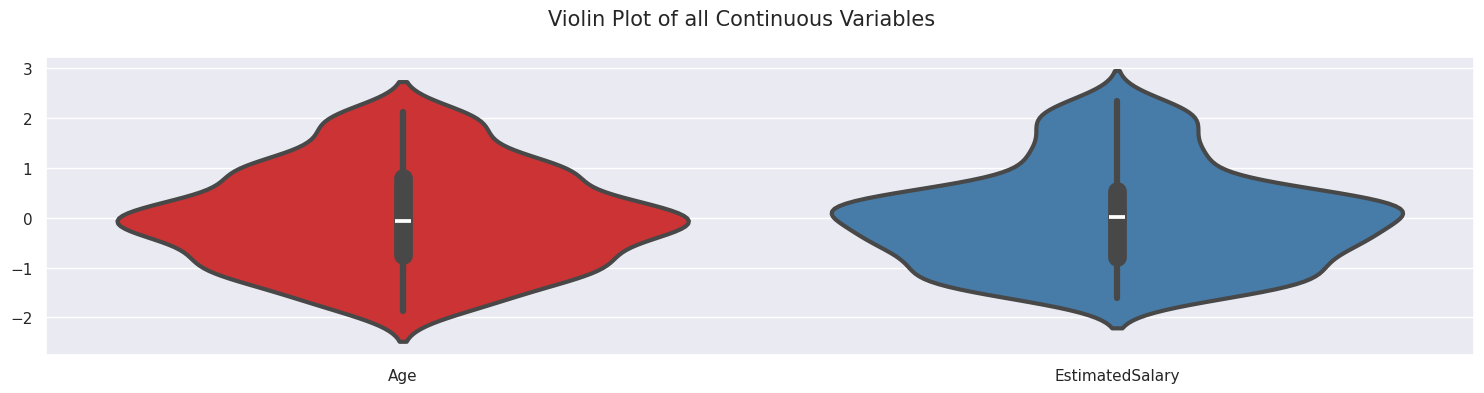

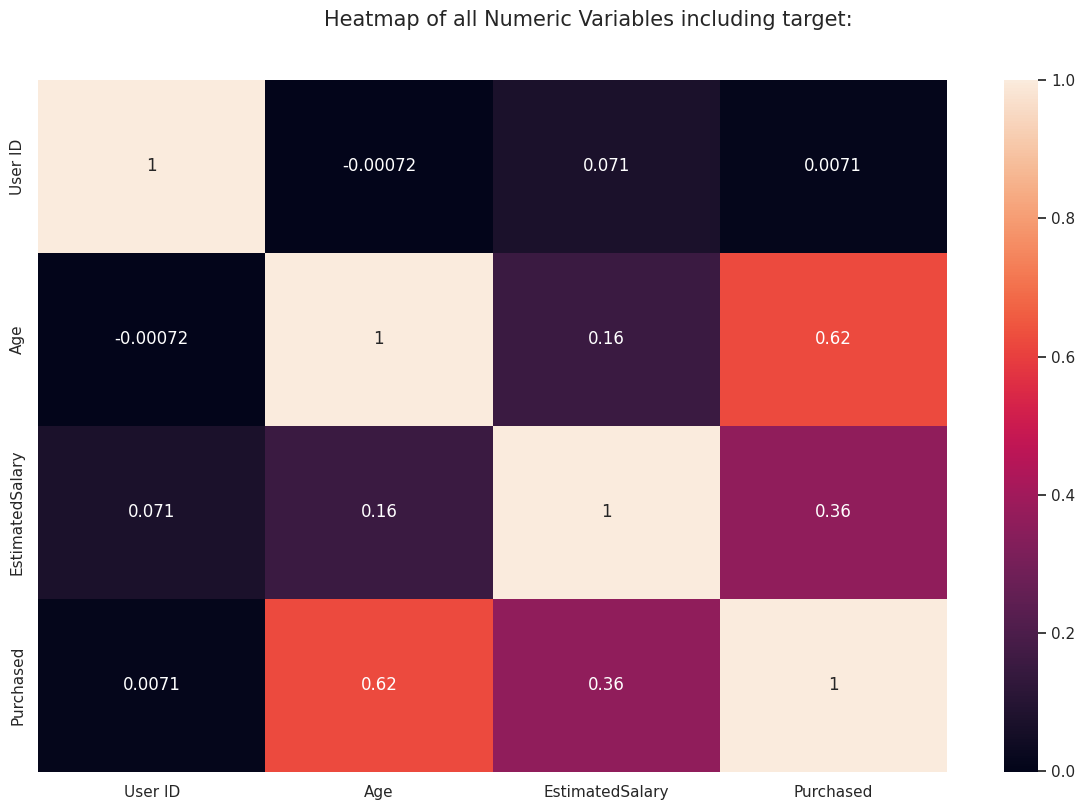

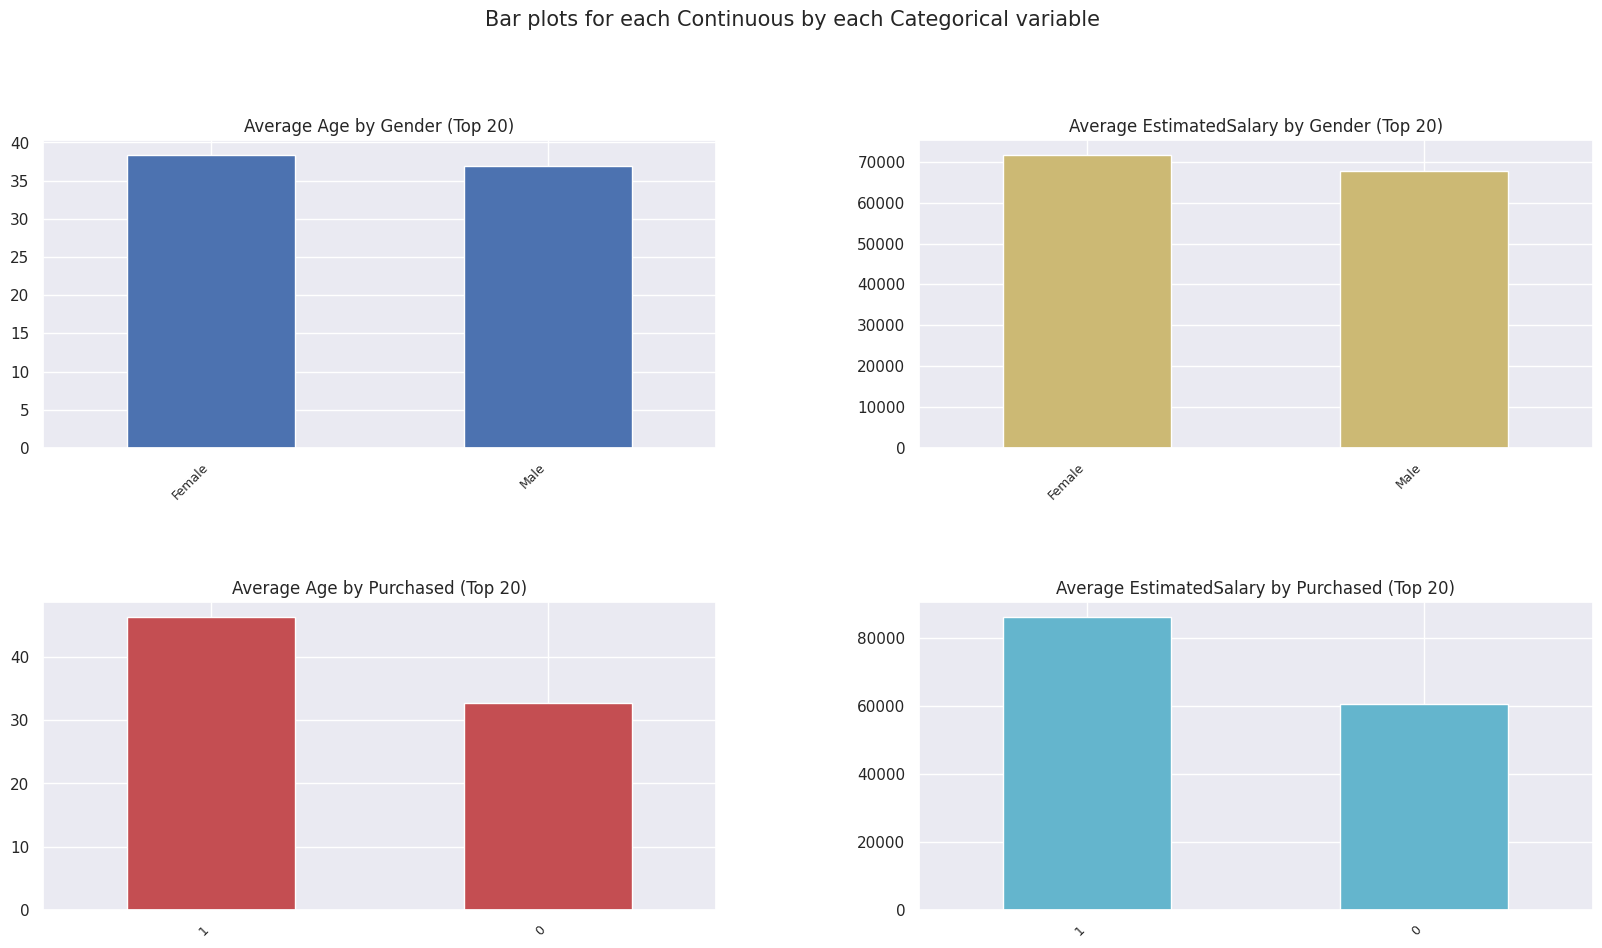

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# Graphical Analysis

AV = AutoViz_Class()
autoviz_report = AV.AutoViz('Social_Network_Ads.csv')

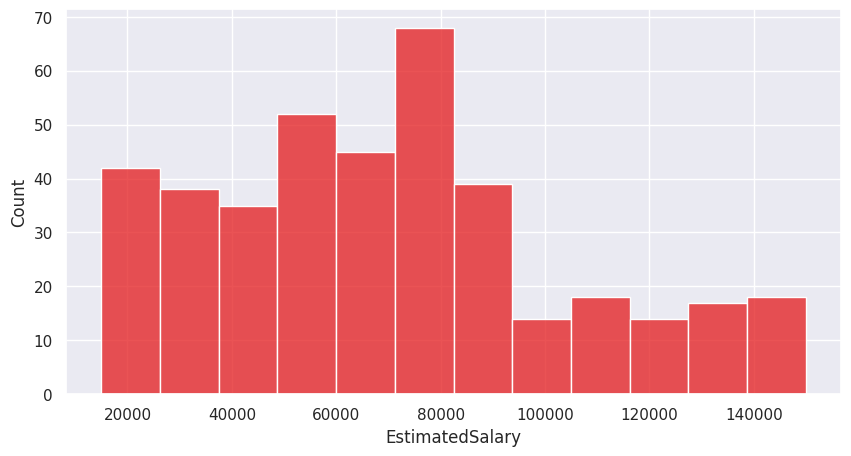

In [ ]:
# checking the distribution of 'EstimatedSalary'

plt.figure(figsize=(10,5))
sns.histplot(soc_net['EstimatedSalary'])
plt.show()

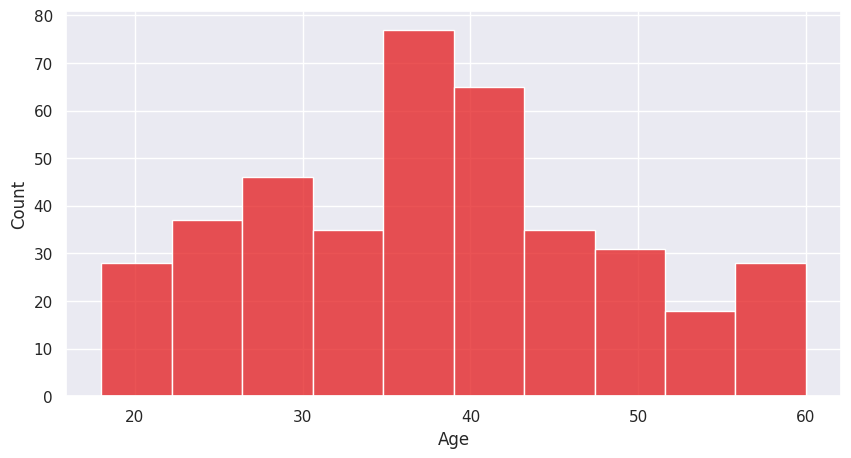

In [ ]:
# checking the distribution of 'Age'

plt.figure(figsize=(10,5))
sns.histplot(soc_net['Age'])
plt.show()

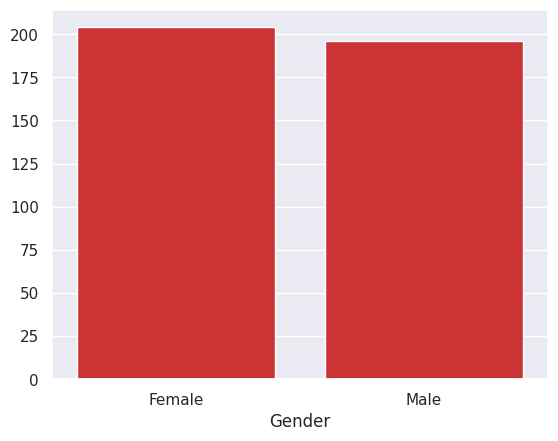

In [ ]:
# Gender Distribution
sns.barplot(x=soc_net['Gender'].value_counts().index,
            y=soc_net['Gender'].value_counts().values)
plt.show()

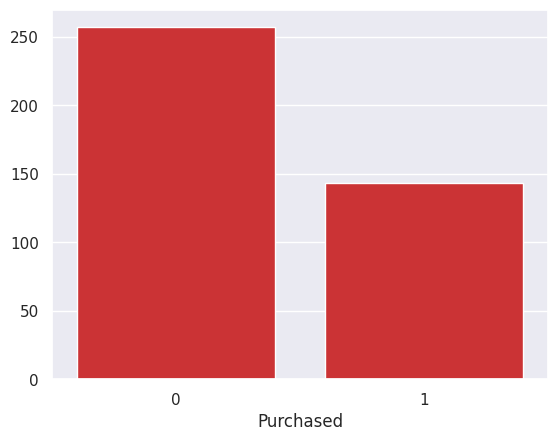

In [ ]:
# Purchased Distribution

sns.barplot(x=soc_net['Purchased'].value_counts().index,
            y=soc_net['Purchased'].value_counts().values)
plt.show()

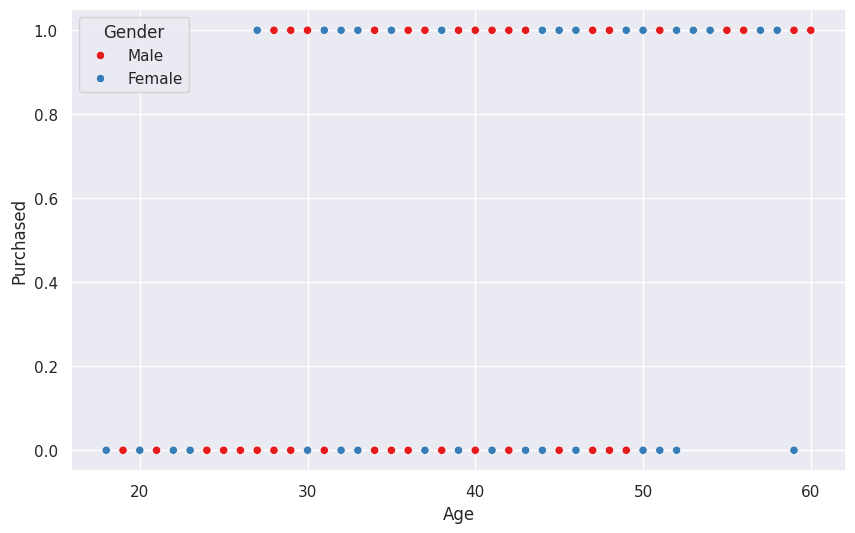

In [ ]:
# Scatterplot

plt.figure(figsize=(10,6))
sns.scatterplot(data=soc_net, x='Age', y='Purchased', hue='Gender')
plt.show()

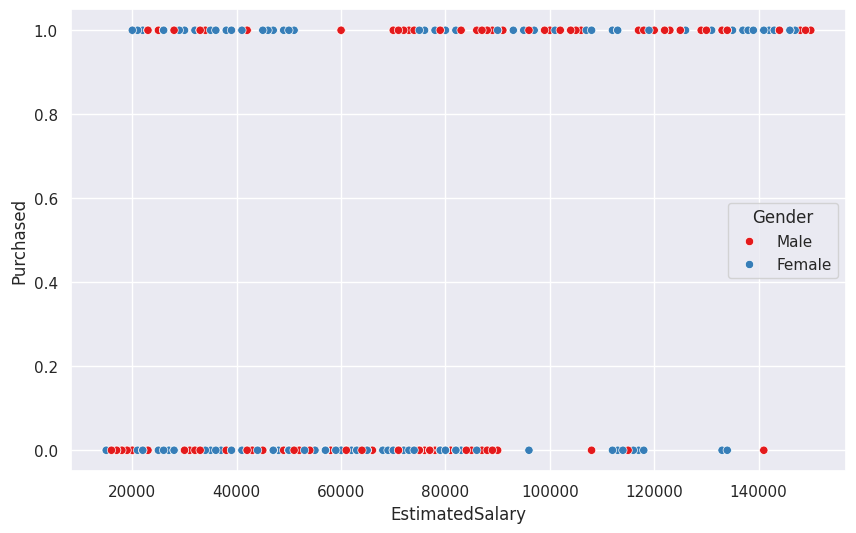

In [ ]:
# Scatterplot

plt.figure(figsize=(10,6))
sns.scatterplot(data=soc_net, x='EstimatedSalary', y='Purchased', hue='Gender')
plt.show()

In [ ]:
# Preprocessing
# Drop the column of 'User ID'

soc_net.drop(columns = ['User ID'],inplace = True)
soc_net.shape

(400, 4)

In [ ]:
# data types

soc_net.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
# Categorical value converting to numeric way of category

def ordinal_encoder(soc_net, feats):
    for feat in feats:
        feat_val = list(np.arange(soc_net[feat].nunique()))
        feat_key = list(soc_net[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        soc_net[feat] = soc_net[feat].map(feat_dict)
    return soc_net

social_network = ordinal_encoder(soc_net, soc_net.drop(['Purchased'], axis=1).columns)
social_network.sample(5)

Gender  Age  EstimatedSalary  Purchased
61      1     7          68            0    
348     1    21          58            0    
163     1    17          22            0    
7       0    14         116            1    
275     1    39          55            1

In [ ]:
BLR_X = social_network.drop(columns = ['Purchased'])
BLR_y = social_network['Purchased']

In [ ]:
scalar = StandardScaler()
BLR_X_scaled = scalar.fit_transform(BLR_X)

In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(BLR_X_scaled,i) for i in range(BLR_X_scaled.shape[1])]
vif["Features"] = BLR_X.columns

#let's check the values
vif

vif       Features    
0  1.007508           Gender
1  1.026517              Age
2  1.024056  EstimatedSalary

In [ ]:
BLR_x_train,BLR_x_test,BLR_y_train,BLR_y_test = train_test_split(BLR_X_scaled,BLR_y, test_size= 0.25, random_state = 29)

In [ ]:
# Model Building

BLR_log_reg = LogisticRegression()

BLR_log_reg.fit(BLR_x_train,BLR_y_train)

LogisticRegression()

In [ ]:
BLR_y_pred = BLR_log_reg.predict(BLR_x_test)

In [ ]:
# Accuracy

accuracy = accuracy_score(BLR_y_test,BLR_y_pred)
accuracy

0.8

In [ ]:
# Confusion Matrix

conf_mat = confusion_matrix(BLR_y_test,BLR_y_pred)
conf_mat

array([[63,  6],
       [14, 17]])

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
# Breaking down the formula for Accuracy
Acc_for = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Acc_for

0.8

In [ ]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9130434782608695

In [ ]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [ ]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.863013698630137

In [ ]:
# Area Under Curve
auc = roc_auc_score(BLR_y_test, BLR_y_pred)
auc

0.7307152875175316

In [ ]:
fpr, tpr, thresholds = roc_curve(BLR_y_test, BLR_y_pred)

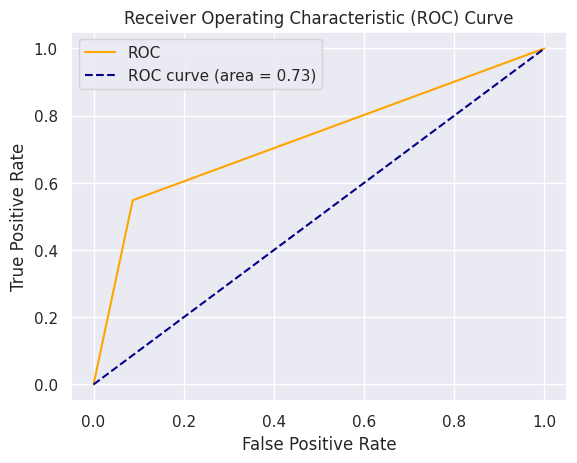

In [ ]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
# Hyperparameter Tuning
# Random Search CV

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
BLR_parameter = {'penalty':('l1','l2','elasticnet',None) , 'C':[1,10,20]}
BLR_random_cv = RandomizedSearchCV(LogisticRegression() , param_distributions=BLR_parameter, cv=5 )

In [ ]:
BLR_random_cv.fit(BLR_x_train, BLR_y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 20],
                                        'penalty': ('l1', 'l2', 'elasticnet',
                                                    None)})

In [ ]:
BLR_random_cv.best_params_

{'penalty': 'l2', 'C': 10}

In [ ]:
BLR_randomclassifier = LogisticRegression(C=10 , penalty='l2')
BLR_randomclassifier.fit(BLR_x_train,BLR_y_train)
BLR_randomclassifier_y_pred = BLR_random_cv.predict(BLR_x_test)
print(confusion_matrix(BLR_y_test , BLR_randomclassifier_y_pred))
print(accuracy_score(BLR_y_test, BLR_randomclassifier_y_pred))
print(classification_report(BLR_y_test , BLR_randomclassifier_y_pred))

[[63  6]
 [14 17]]
0.8
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        69
           1       0.74      0.55      0.63        31

    accuracy                           0.80       100
   macro avg       0.78      0.73      0.75       100
weighted avg       0.79      0.80      0.79       100



In [ ]:
# Grid Search CV

from sklearn.model_selection import GridSearchCV

In [ ]:
BLR_gridcv = GridSearchCV(BLR_log_reg, param_grid=BLR_parameter, cv=5)
BLR_gridcv.fit(BLR_x_train,BLR_y_train)
BLR_gridcv.best_params_

{'C': 1, 'penalty': 'l2'}

In [ ]:
BLR_gridsearchcv = LogisticRegression(C=1 , penalty='l2')
BLR_gridsearchcv.fit(BLR_x_train , BLR_y_train)
BLR_gridsearchcv_y_pred = BLR_log_reg.predict(BLR_x_test)
print(confusion_matrix(BLR_y_test , BLR_gridsearchcv_y_pred))
print(accuracy_score(BLR_y_test, BLR_gridsearchcv_y_pred))
print(classification_report(BLR_y_test , BLR_gridsearchcv_y_pred))

[[63  6]
 [14 17]]
0.8
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        69
           1       0.74      0.55      0.63        31

    accuracy                           0.80       100
   macro avg       0.78      0.73      0.75       100
weighted avg       0.79      0.80      0.79       100



# End of Binary Classification in Logistic Regression

# Logistic Regression - Multiclass Classification

In [ ]:
# Importing the data

redwine = pd.read_csv('winequality-red-1.csv')
redwine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       7.4             0.70           0.00            1.9         0.076     
1       7.8             0.88           0.00            2.6         0.098     
2       7.8             0.76           0.04            2.3         0.092     
3      11.2             0.28           0.56            1.9         0.075     
4       7.4             0.70           0.00            1.9         0.076     

   free sulfur dioxide  total sulfur dioxide  density   pH   sulphates  \
0         11.0                  34.0          0.9978   3.51    0.56      
1         25.0                  67.0          0.9968   3.20    0.68      
2         15.0                  54.0          0.9970   3.26    0.65      
3         17.0                  60.0          0.9980   3.16    0.58      
4         11.0                  34.0          0.9978   3.51    0.56      

   alcohol  quality  
0    9.4       5     
1    9.8       5     
2    9.8       5     
3    9.8       6     
4    9.4       5

In [ ]:
# Profile of the data

redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Statistical Analysis

redwine.describe(include = 'all').T

count    mean        std       min      25%    \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                         50%       75%        max     
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [ ]:
# Null Values

redwine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Shape of your Data Set loaded: (1599, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  11
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    12 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 240 

Number of All Scatter Plots = 66


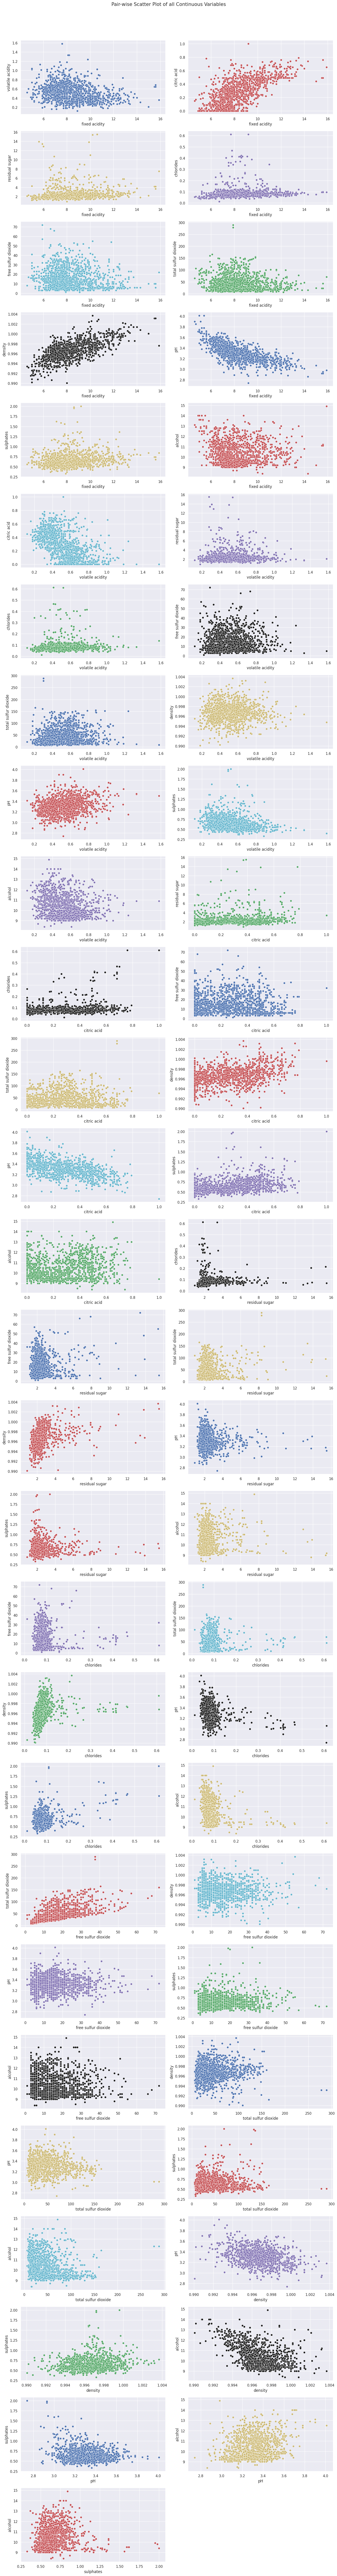

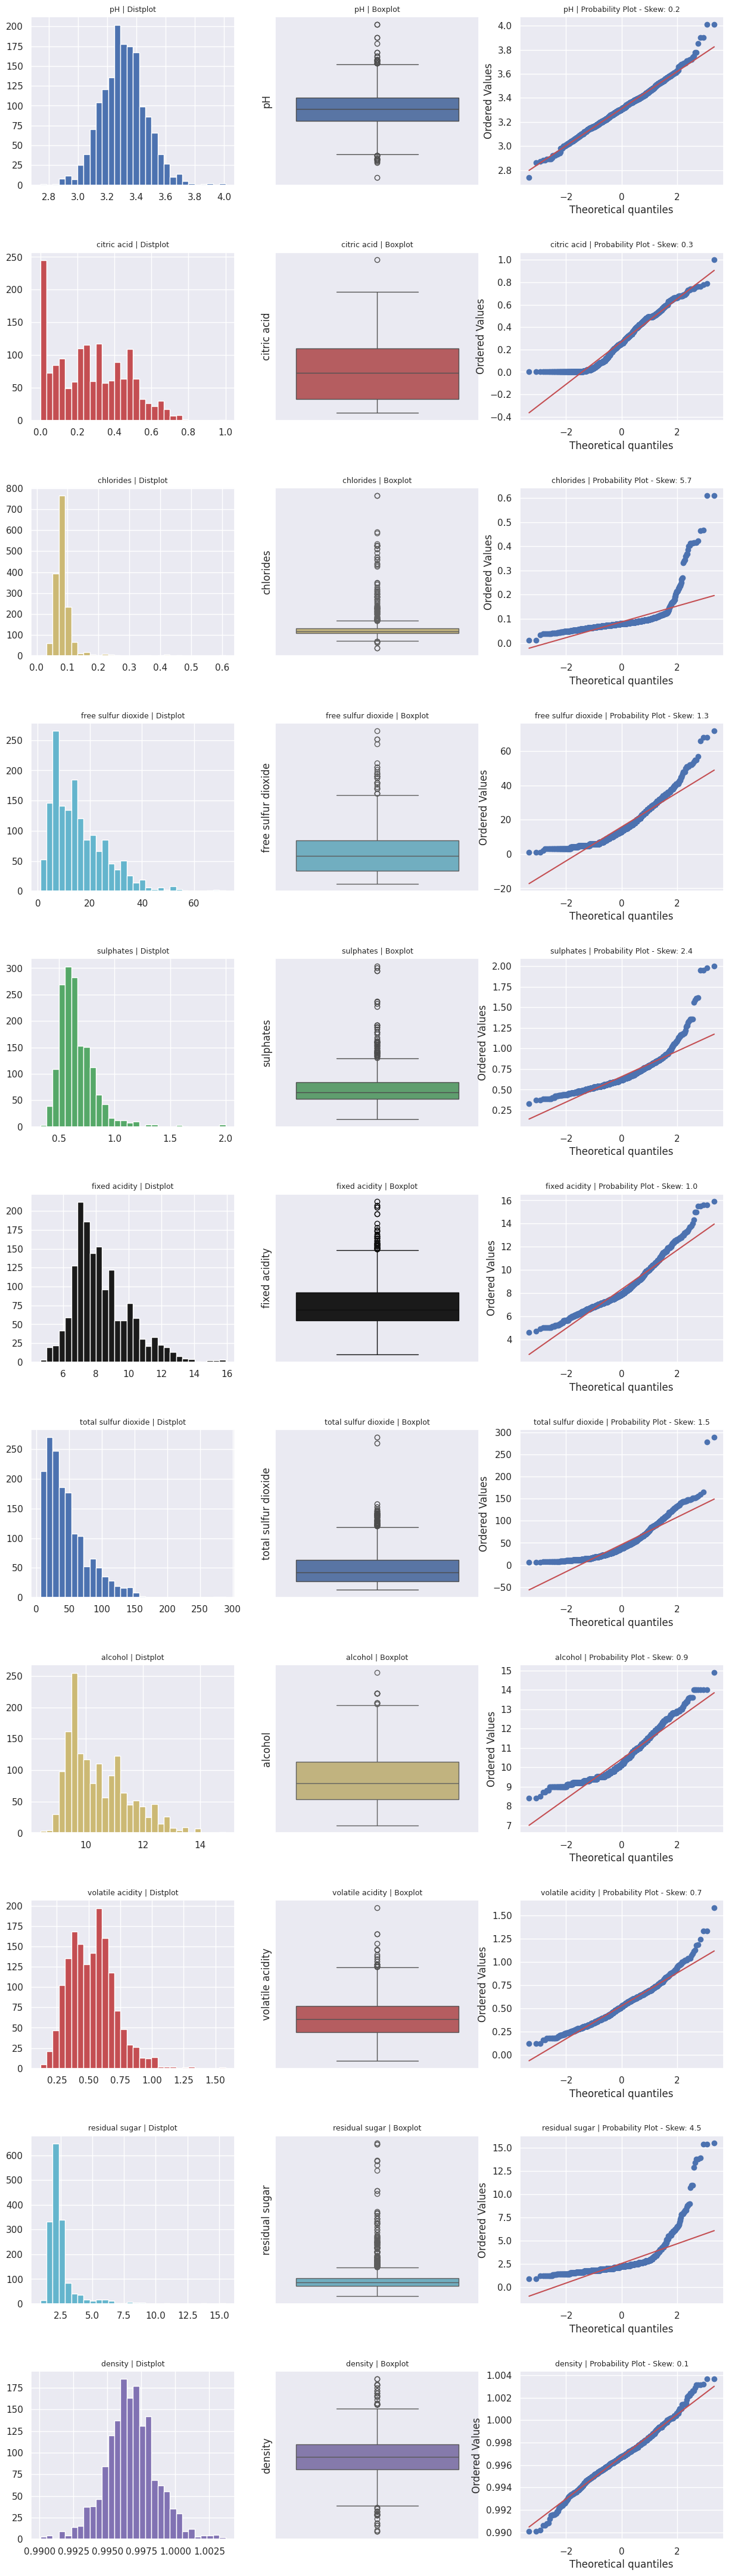

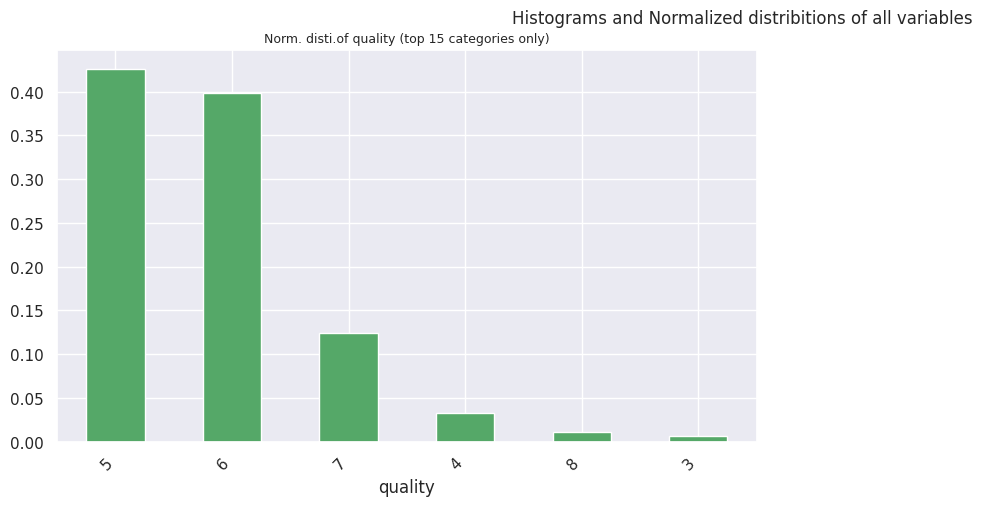

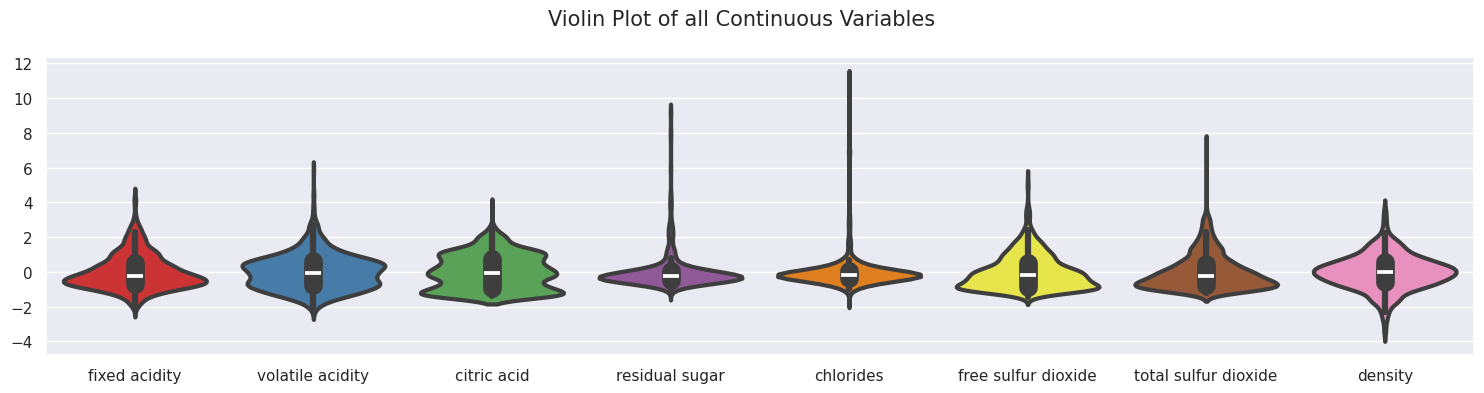

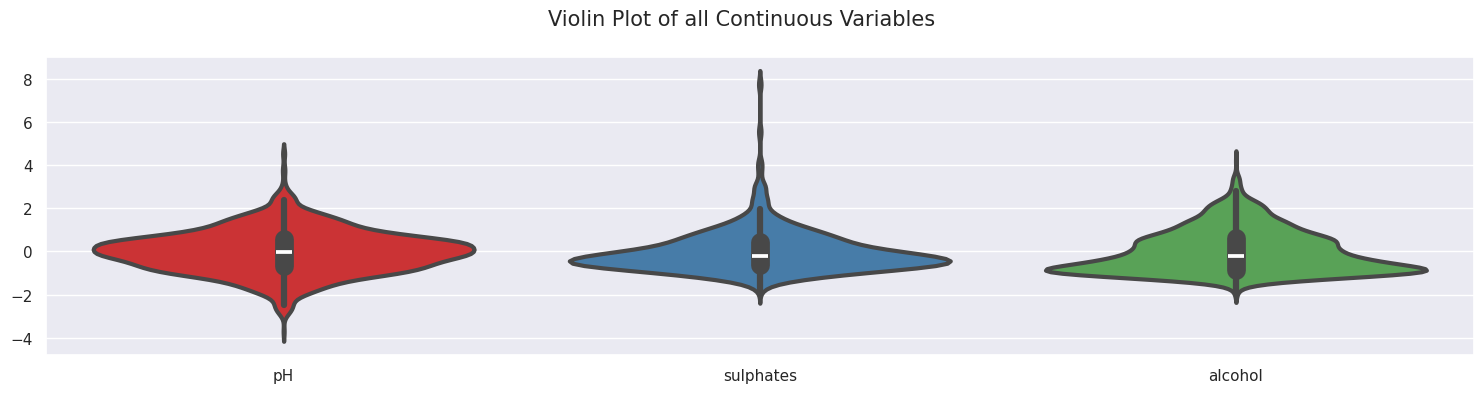

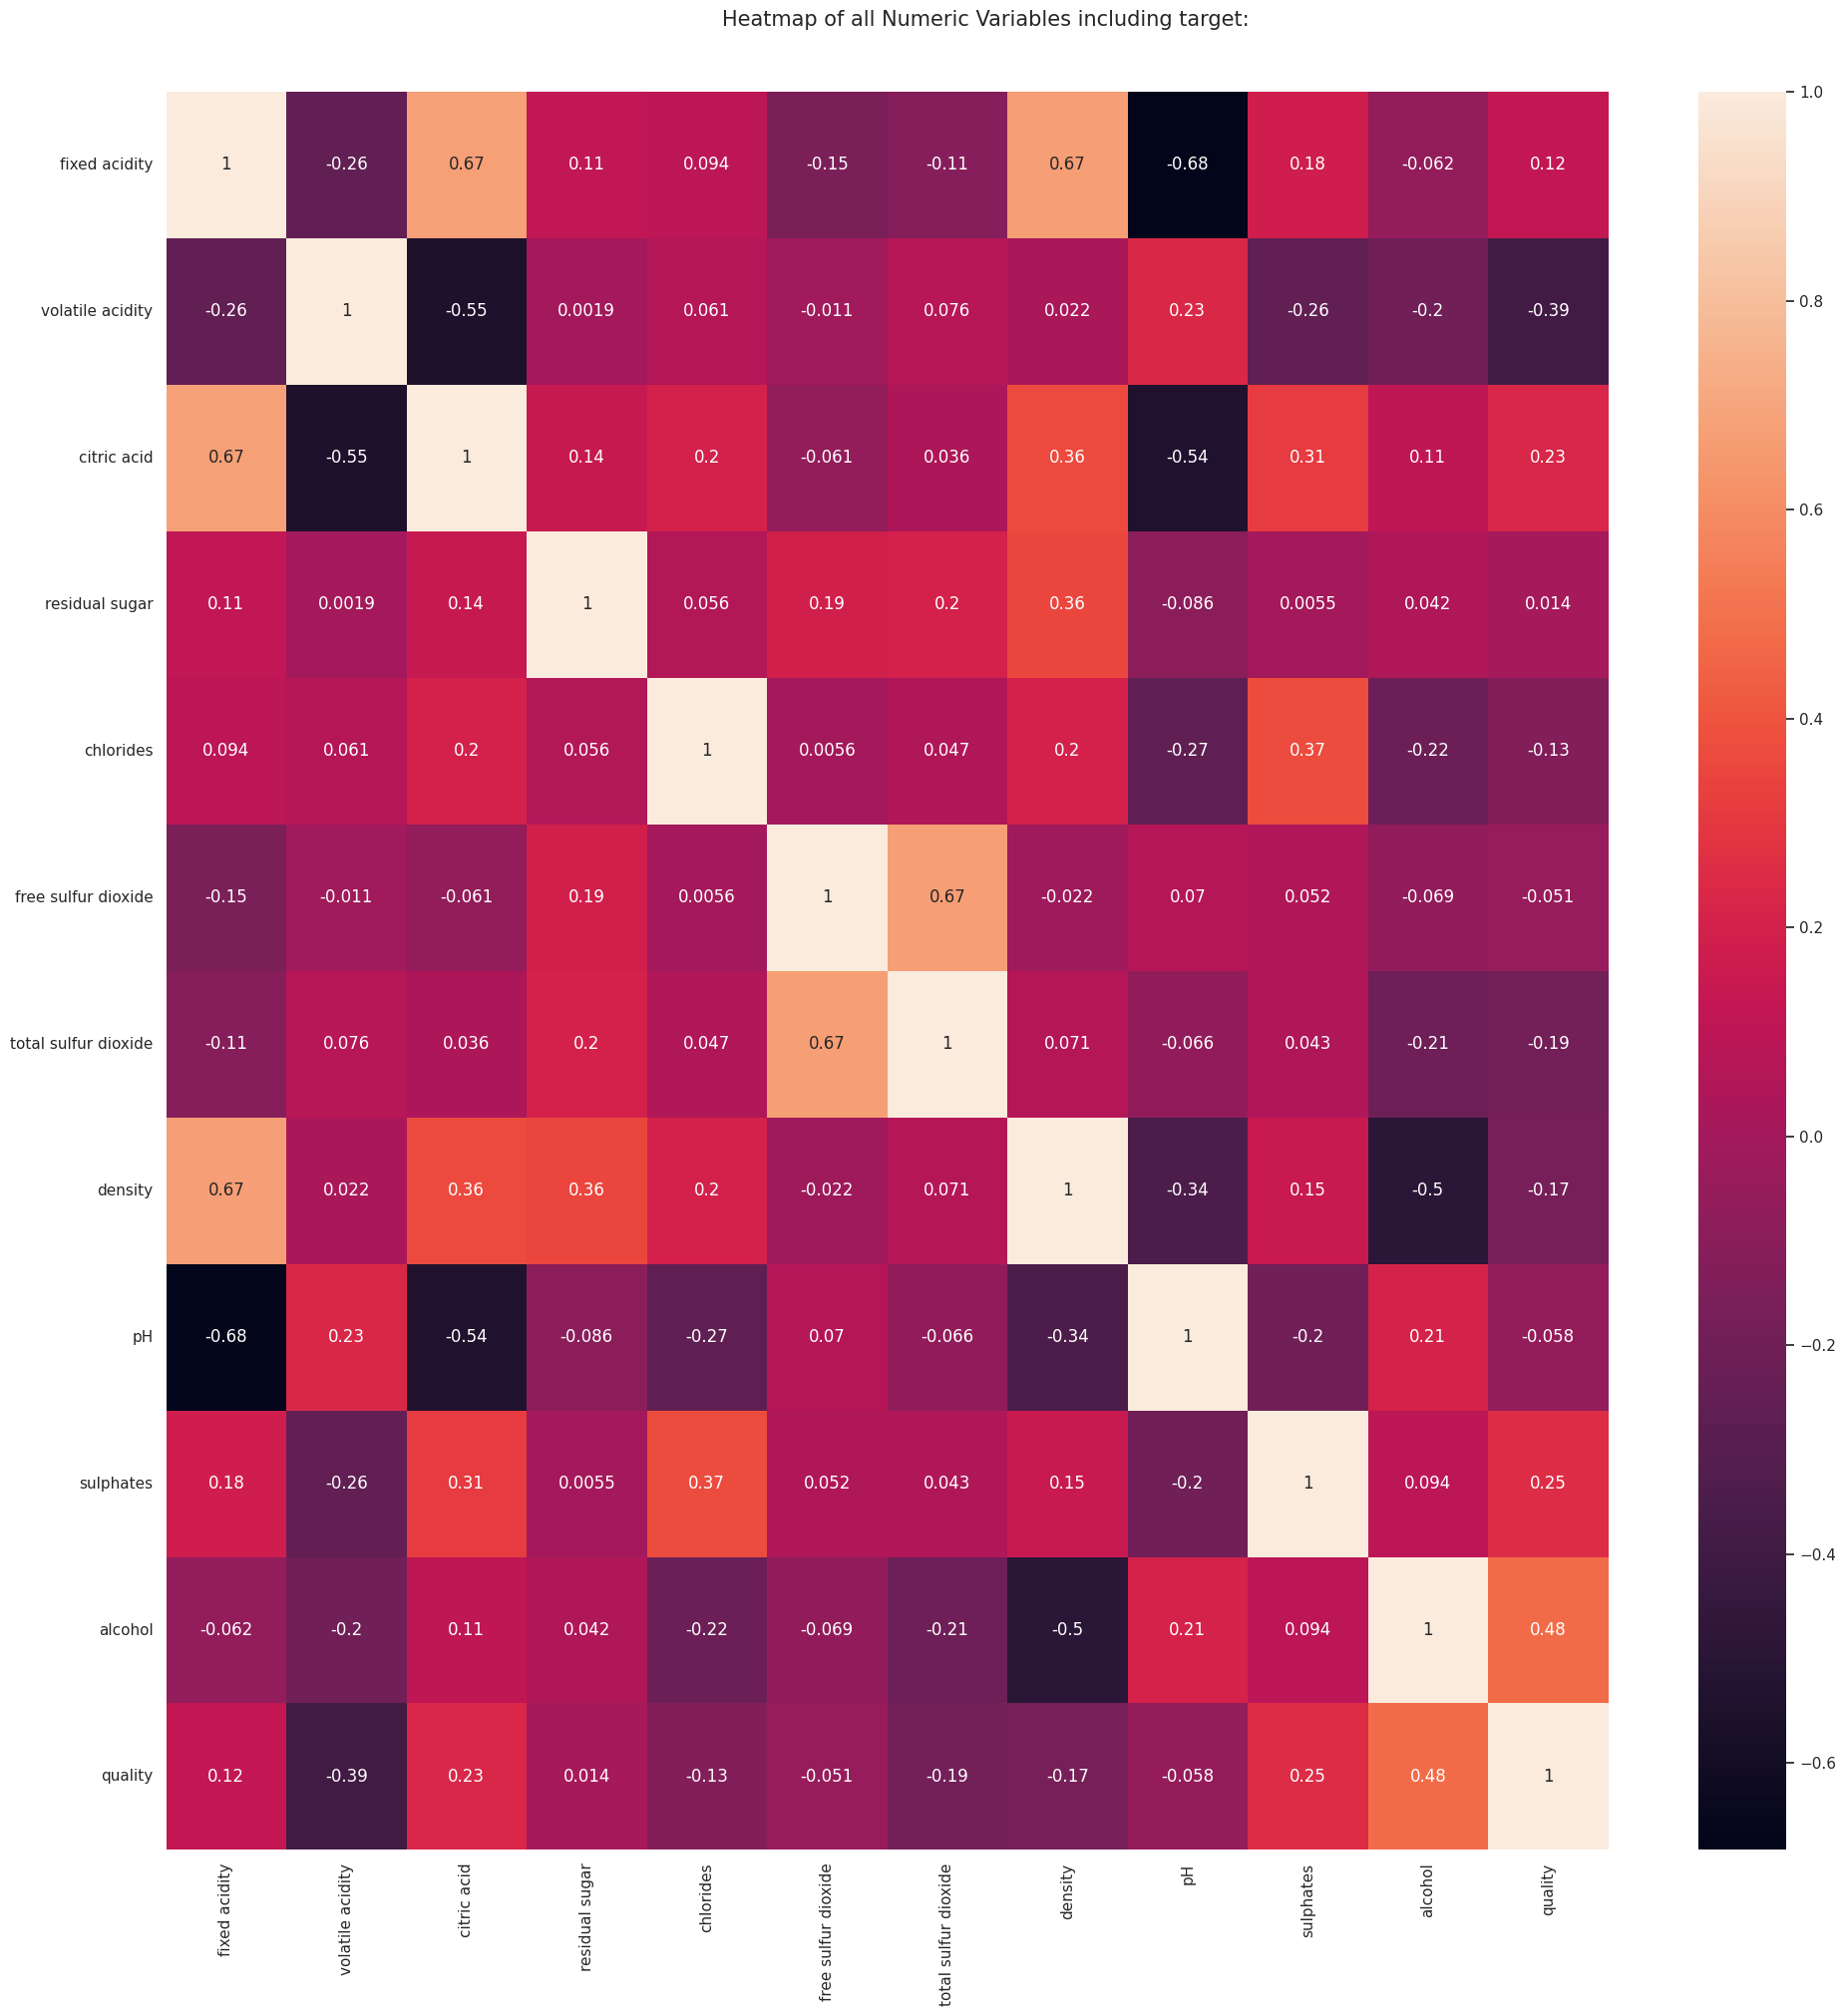

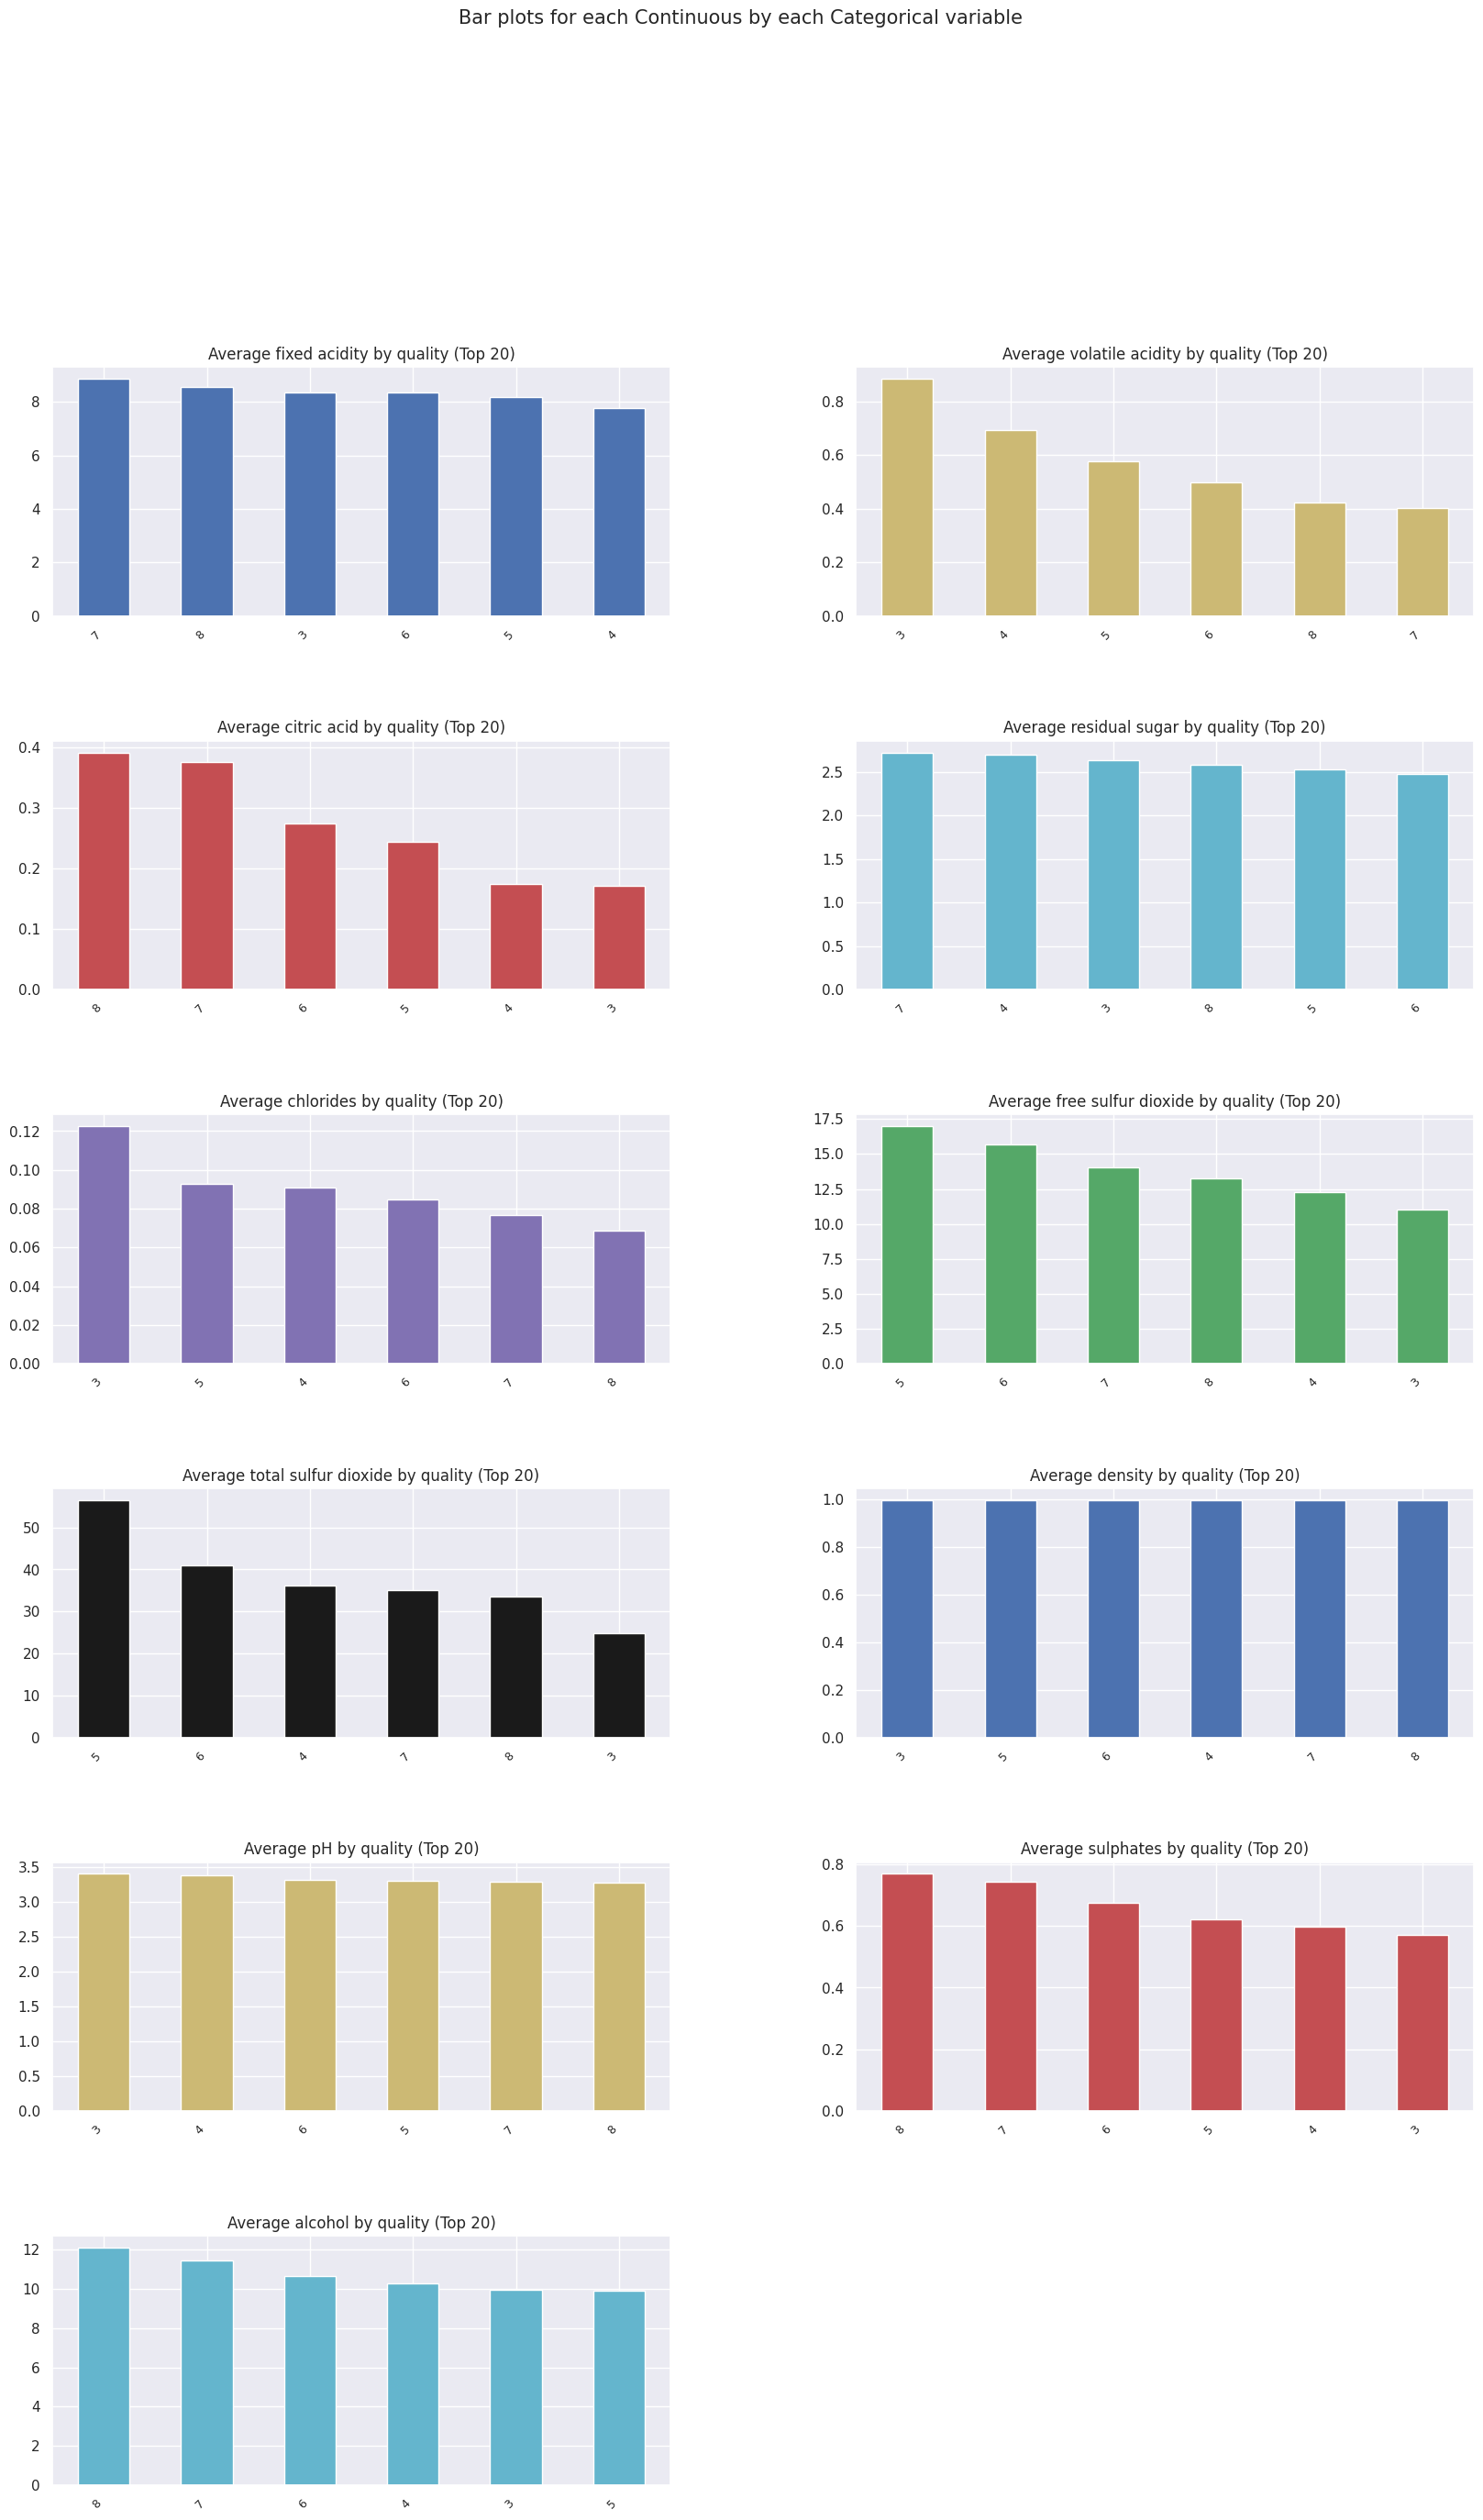

All Plots done
Time to run AutoViz = 39 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# Graphical Analysis

autoviz_report = AV.AutoViz('winequality-red-1.csv')

<Axes: >

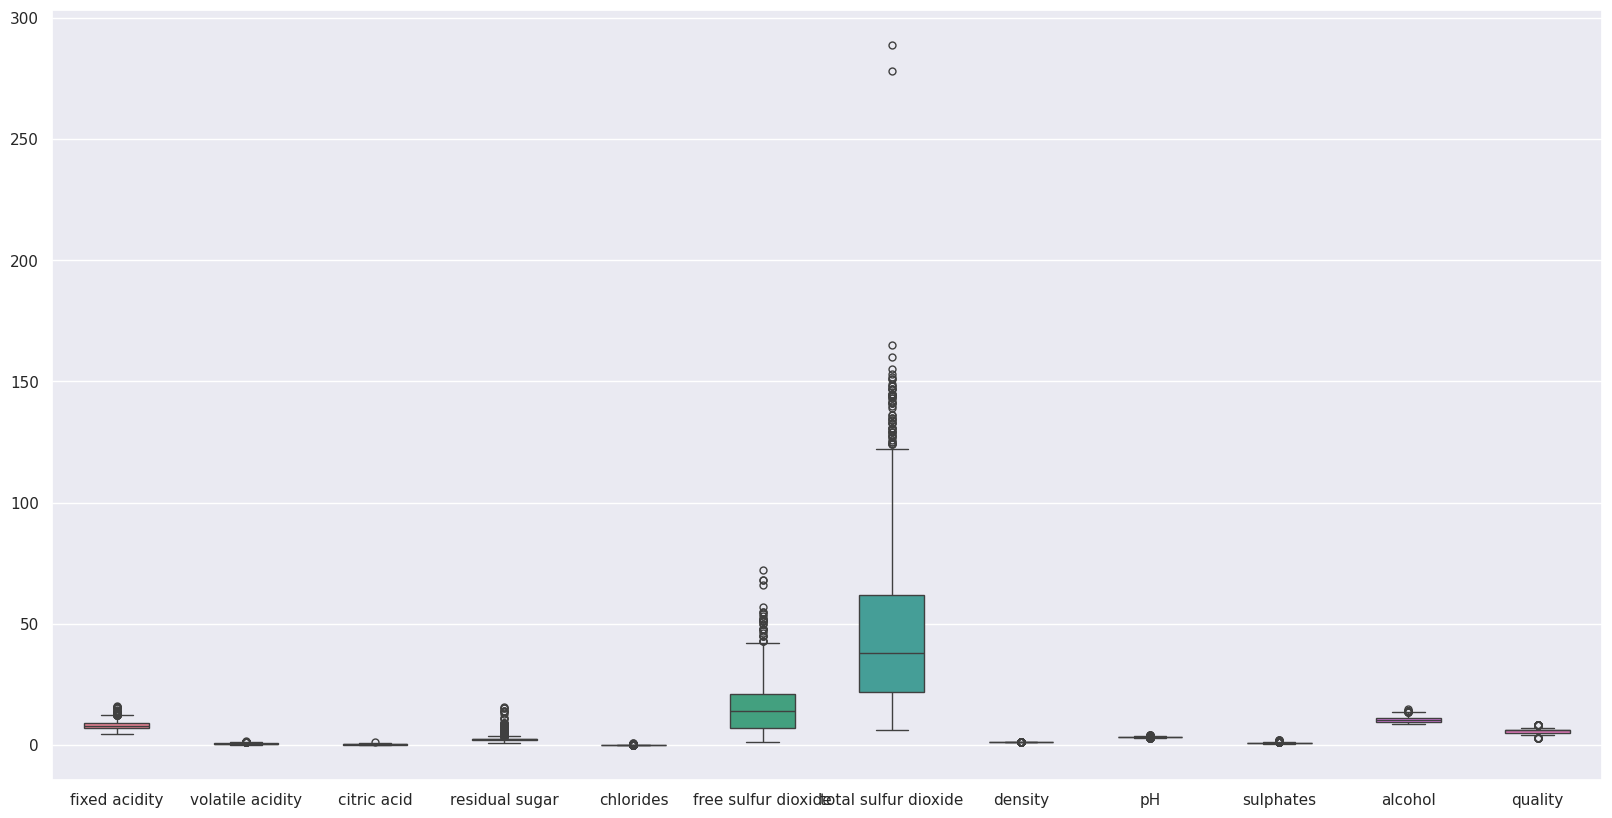

In [ ]:
# Boxplot

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=redwine, width= 0.5,ax=ax,  fliersize=5)

In [ ]:
Q1 = redwine.quantile(0.25)
Q3 = redwine.quantile(0.75)
IQR = Q3 - Q1
update_redwine = redwine[~((redwine < (Q1 - 1.5 * IQR)) | (redwine > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
update_redwine.describe(include = 'all').T

count    mean        std       min       25%    \
fixed acidity         1179.0   8.162002   1.458270  5.10000   7.10000   
volatile acidity      1179.0   0.523066   0.164231  0.12000   0.39000   
citric acid           1179.0   0.246760   0.179441  0.00000   0.08000   
residual sugar        1179.0   2.185411   0.440972  1.20000   1.90000   
chlorides             1179.0   0.078586   0.014317  0.04100   0.06900   
free sulfur dioxide   1179.0  15.020356   8.792916  1.00000   8.00000   
total sulfur dioxide  1179.0  42.268024  26.106438  6.00000  22.00000   
density               1179.0   0.996584   0.001593  0.99236   0.99552   
pH                    1179.0   3.324623   0.131731  2.94000   3.23000   
sulphates             1179.0   0.631264   0.116098  0.33000   0.55000   
alcohol               1179.0  10.350792   0.963954  8.70000   9.50000   
quality               1179.0   5.623410   0.721248  4.00000   5.00000   

                        50%      75%      max    
fixed acidity          7.8000   9.0000   12.300  
volatile acidity       0.5200   0.6300    1.005  
citric acid            0.2400   0.3900    0.730  
residual sugar         2.1000   2.5000    3.600  
chlorides              0.0780   0.0870    0.119  
free sulfur dioxide   13.0000  20.0000   42.000  
total sulfur dioxide  36.0000  56.0000  122.000  
density                0.9966   0.9976    1.001  
pH                     3.3300   3.4100    3.680  
sulphates              0.6100   0.7000    0.980  
alcohol               10.1000  11.0000   13.400  
quality                6.0000   6.0000    7.000

In [ ]:
update_redwine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity           1.000000        -0.271010       0.659397     
volatile acidity       -0.271010         1.000000      -0.627194     
citric acid             0.659397        -0.627194       1.000000     
residual sugar          0.229653         0.035215       0.149494     
chlorides               0.197774         0.117805       0.073031     
free sulfur dioxide    -0.150845        -0.016718      -0.068852     
total sulfur dioxide   -0.087083         0.097487       0.004660     
density                 0.610125         0.044174       0.305458     
pH                     -0.684378         0.220702      -0.470286     
sulphates               0.165367        -0.317346       0.256747     
alcohol                -0.037999        -0.220600       0.137762     
quality                 0.113422        -0.346962       0.212133     

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity            0.229653     0.197774       -0.150845         
volatile acidity         0.035215     0.117805       -0.016718         
citric acid              0.149494     0.073031       -0.068852         
residual sugar           1.000000     0.232752        0.088405         
chlorides                0.232752     1.000000        0.012326         
free sulfur dioxide      0.088405     0.012326        1.000000         
total sulfur dioxide     0.199534     0.176938        0.619675         
density                  0.394732     0.411902       -0.021505         
pH                      -0.054684    -0.175758        0.149126         
sulphates                0.040172    -0.076853        0.107455         
alcohol                  0.098175    -0.300750       -0.022415         
quality                  0.007934    -0.190869       -0.003609         

                      total sulfur dioxide   density     pH     sulphates  \
fixed acidity              -0.087083        0.610125 -0.684378  0.165367    
volatile acidity            0.097487        0.044174  0.220702 -0.317346    
citric acid                 0.004660        0.305458 -0.470286  0.256747    
residual sugar              0.199534        0.394732 -0.054684  0.040172    
chlorides                   0.176938        0.411902 -0.175758 -0.076853    
free sulfur dioxide         0.619675       -0.021505  0.149126  0.107455    
total sulfur dioxide        1.000000        0.149847  0.010031 -0.049655    
density                     0.149847        1.000000 -0.227471  0.081691    
pH                          0.010031       -0.227471  1.000000  0.013972    
sulphates                  -0.049655        0.081691  0.013972  1.000000    
alcohol                    -0.245125       -0.538901  0.126747  0.260783    
quality                    -0.203374       -0.215375 -0.060288  0.413533    

                       alcohol   quality  
fixed acidity        -0.037999  0.113422  
volatile acidity     -0.220600 -0.346962  
citric acid           0.137762  0.212133  
residual sugar        0.098175  0.007934  
chlorides            -0.300750 -0.190869  
free sulfur dioxide  -0.022415 -0.003609  
total sulfur dioxide -0.245125 -0.203374  
density              -0.538901 -0.215375  
pH                    0.126747 -0.060288  
sulphates             0.260783  0.413533  
alcohol               1.000000  0.492551  
quality               0.492551  1.000000